El objetivo del estudio es analizar la relación entre el uso diario de redes sociales y el rendimiento académico de los estudiantes. 

El objetivo será ver una correlación entre las dos variables

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn  as sns

In [4]:
# Cargar los archivos

df= pd.read_csv('Students Social Media Addiction.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [12]:
avg_use= df['Avg_Daily_Usage_Hours'].mean(axis=0)

print(f"Promedio de uso diario: {avg_use:.2f} horas")

Promedio de uso diario: 4.92 horas


In [24]:
df[df['Affects_Academic_Performance']== 'Yes'].shape[0]

df['Affects_Academic_Performance'].str.contains('yes', case=False).sum()

np.int64(453)

In [34]:
#correlación

corr_var = df['Addicted_Score'].corr(df['Mental_Health_Score'], method= 'spearman')

if corr_var < 0:
    print(f'correlación inversamente proporcional de {corr_var:.2f}')
else:
    print(f'correlación proporcional de {corr_var:.2f}')

correlación inversamente proporcional de -0.95


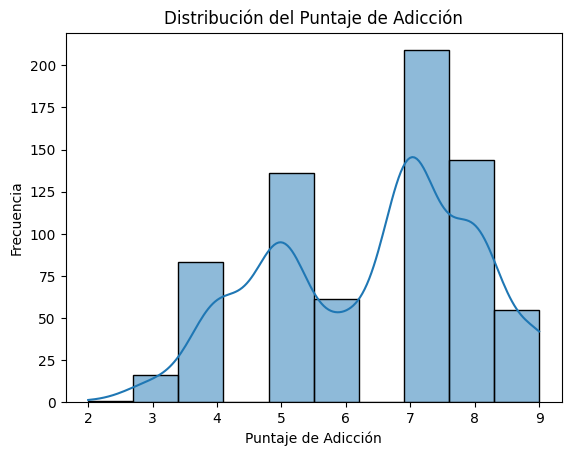

In [42]:
sns.histplot(df['Addicted_Score'], bins=10, kde=True)
plt.title('Distribución del Puntaje de Adicción')
plt.xlabel('Puntaje de Adicción')
plt.ylabel('Frecuencia')
plt.show()